##### WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities from around the globe
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city_name = city.city_name
        
    # If the city is unique, then add it to a our cities list
    if city_name not in cities:
        cities.append(city_name)
        
# Print the city count to confirm sufficient count

len(cities)


636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# The following code was generated by adapting and modifying similar coding from karikashah @ https://github.com/karikashah/python-api-challenge/blob/master/WeatherPy.ipynb

# Generate a DataFrame that stores weather info for the global cities generated with citipy
df_global_cities = pd.DataFrame({'City': cities})

# Add blank columns to store additional information from openweathermap api
df_global_cities['Cloudiness'] = ''
df_global_cities['Country'] = ''
df_global_cities['Date'] = ''
df_global_cities['Humidity'] = ''
df_global_cities['Latitude'] = ''
df_global_cities['Longitude'] = ''
df_global_cities['Max Temp (F)'] = ''
df_global_cities['Wind Speed (mph)'] = ''

# Counter for cities with weather information
city_count = 0

# initializing # of variables
api_call_count = 1 # count for API calls made to OpenWeatherAPI, max 60 counts allowed for free API calls
sets = 0 # counter to count the number of call sets
t0 = time.time() # get current time

#loop through all rows and fill in values for blank columns in dataframe
for index,row in df_global_cities.iterrows():
    city_name = row['City']
    
    # create a dictionary to contain the query parameters
    search_parameters = {
        "q": str(city_name),
        "units": "IMPERIAL",
        "mode": "json",
        "APIKEY": api_key
    }
    
    #api call for all Cities 
    target_url = "http://api.openweathermap.org/data/2.5/weather"
    city_info = requests.get(target_url, params = search_parameters).json()
    
    try:
        df_global_cities.loc[index,'Cloudiness'] = city_info['clouds']['all']
        df_global_cities.loc[index,'Country'] = city_info['sys']['country']
        df_global_cities.loc[index, 'Date'] = city_info['dt']        
        df_global_cities.loc[index,'Humidity'] = city_info['main']['humidity']
        df_global_cities.loc[index,'Latitude'] = city_info['coord']['lat']
        df_global_cities.loc[index,'Longitude'] = city_info['coord']['lon']
        df_global_cities.loc[index,'Max Temp (F)'] = city_info['main']['temp_max']
        df_global_cities.loc[index,'Wind Speed (mph)'] = city_info['wind']['speed']

        
        #print log for each city
        print(f'Processing Record {api_call_count} of Set {sets} | {city_name}' )
        
        city_count = city_count + 1 # only increment if you get all the weather information
    
    except KeyError:
        df_global_cities.loc[index,'Cloudiness'] = np.nan
        df_global_cities.loc[index,'Country'] = np.nan
        df_global_cities.loc[index, 'Date'] = np.nan        
        df_global_cities.loc[index,'Humidity'] = np.nan
        df_global_cities.loc[index,'Latitude'] = np.nan
        df_global_cities.loc[index,'Longitude'] = np.nan
        df_global_cities.loc[index,'Max Temp (F)'] = np.nan
        df_global_cities.loc[index,'Wind Speed (mph)'] = np.nan
        print(f"Missing information for city named: {city_name} so it is skipped")
        
    api_call_count = api_call_count + 1  
    
    if api_call_count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1 = time.time()
        api_call_count = 1 # reset it for next 50 calls
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0 = time.time()
        
print(f"Weather information gathered for {city_count} cities.")

Processing Record 1 of Set 0 | nikolskoye
Missing information for city named: taolanaro so it is skipped
Processing Record 3 of Set 0 | khatanga
Processing Record 4 of Set 0 | arraial do cabo
Processing Record 5 of Set 0 | punta arenas
Processing Record 6 of Set 0 | bluff
Processing Record 7 of Set 0 | yellowknife
Processing Record 8 of Set 0 | sitka
Processing Record 9 of Set 0 | busselton
Processing Record 10 of Set 0 | sorland
Processing Record 11 of Set 0 | hobart
Processing Record 12 of Set 0 | benicarlo
Processing Record 13 of Set 0 | hithadhoo
Missing information for city named: belushya guba so it is skipped
Processing Record 15 of Set 0 | mahebourg
Processing Record 16 of Set 0 | ribeira grande
Processing Record 17 of Set 0 | port alfred
Processing Record 18 of Set 0 | ponta delgada
Missing information for city named: jiddah so it is skipped
Processing Record 20 of Set 0 | torbay
Processing Record 21 of Set 0 | tam ky
Processing Record 22 of Set 0 | cape town
Processing Record

Processing Record 39 of Set 3 | montmagny
Processing Record 40 of Set 3 | jhang
Processing Record 41 of Set 3 | mahur
Processing Record 42 of Set 3 | pitogo
Processing Record 43 of Set 3 | tuktoyaktuk
Processing Record 44 of Set 3 | yulara
Processing Record 45 of Set 3 | zhigansk
Processing Record 46 of Set 3 | batagay-alyta
Processing Record 47 of Set 3 | sept-iles
Processing Record 48 of Set 3 | lincoln
Processing Record 49 of Set 3 | mabaruma
Missing information for city named: araguatins so it is skipped
Processing Record 1 of Set 4 | cherskiy
Processing Record 2 of Set 4 | portland
Processing Record 3 of Set 4 | barrow
Processing Record 4 of Set 4 | fenyi
Processing Record 5 of Set 4 | vestmannaeyjar
Processing Record 6 of Set 4 | deputatskiy
Missing information for city named: tahta so it is skipped
Processing Record 8 of Set 4 | vila velha
Processing Record 9 of Set 4 | saldanha
Processing Record 10 of Set 4 | port elizabeth
Processing Record 11 of Set 4 | boa vista
Processing R

Processing Record 28 of Set 7 | bani walid
Processing Record 29 of Set 7 | touros
Processing Record 30 of Set 7 | olutanga
Processing Record 31 of Set 7 | periyapatti
Processing Record 32 of Set 7 | imbituba
Processing Record 33 of Set 7 | carbonia
Processing Record 34 of Set 7 | honningsvag
Processing Record 35 of Set 7 | rio grande
Processing Record 36 of Set 7 | grand-lahou
Processing Record 37 of Set 7 | alikovo
Processing Record 38 of Set 7 | kabul
Processing Record 39 of Set 7 | nyurba
Processing Record 40 of Set 7 | san rafael
Processing Record 41 of Set 7 | ullapool
Processing Record 42 of Set 7 | broken hill
Processing Record 43 of Set 7 | kenora
Processing Record 44 of Set 7 | szob
Processing Record 45 of Set 7 | houma
Processing Record 46 of Set 7 | alta floresta
Processing Record 47 of Set 7 | yerbogachen
Processing Record 48 of Set 7 | pokhara
Processing Record 49 of Set 7 | tomatlan
Missing information for city named: rolim de moura so it is skipped
Processing Record 1 of

Missing information for city named: palabuhanratu so it is skipped
Processing Record 23 of Set 11 | garissa
Processing Record 24 of Set 11 | krasnoufimsk
Processing Record 25 of Set 11 | itamaraca
Processing Record 26 of Set 11 | rio rancho
Processing Record 27 of Set 11 | xichang
Processing Record 28 of Set 11 | singkang
Processing Record 29 of Set 11 | daru
Processing Record 30 of Set 11 | rokytne
Processing Record 31 of Set 11 | road town
Processing Record 32 of Set 11 | lodja
Processing Record 33 of Set 11 | zuwarah
Processing Record 34 of Set 11 | ambon
Processing Record 35 of Set 11 | caico
Processing Record 36 of Set 11 | hanstholm
Processing Record 37 of Set 11 | maraa
Processing Record 38 of Set 11 | veraval
Processing Record 39 of Set 11 | xai-xai
Processing Record 40 of Set 11 | dicabisagan
Processing Record 41 of Set 11 | vozhega
Processing Record 42 of Set 11 | lesozavodsk
Processing Record 43 of Set 11 | mecca
Missing information for city named: gulshat so it is skipped
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Export df_global_cities weather data into a .csv

df_global_cities.to_csv("GlobalWeatherPy.csv")

In [17]:
# Purge cities without lat-Lng and weather information from df_global_cities

df_global_cities = df_global_cities.dropna()

global_weather_data = pd.DataFrame.from_dict({
    "Cities": df_global_cities['City'].nunique(),
}, orient='index', columns=['Count'])

global_weather_data

,Count
Cities,566


In [19]:
# Print remaining global cities weather data in a DataFrame

new_global_weather_data = pd.DataFrame(df_global_cities)

new_global_weather_data = new_global_weather_data.reset_index(drop=True)

new_global_weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp (F),Wind Speed (mph)
0,nikolskoye,90,RU,1577669482,94,59.7,30.79,32,13.42
1,khatanga,42,RU,1577669477,97,71.98,102.47,-32.57,6.46
2,arraial do cabo,20,BR,1577669538,88,-22.97,-42.02,77,10.29
3,punta arenas,8,CL,1577669418,47,-53.16,-70.91,55.4,11.41
4,bluff,25,AU,1577669539,42,-23.58,149.07,87.96,12.44


In [20]:
new_global_weather_data.tail()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp (F),Wind Speed (mph)
561,havre,1,US,1577670661,85,48.55,-109.68,15.8,5.82
562,biscarrosse,90,FR,1577670661,100,44.41,-1.18,41,5.82
563,dovers,75,VC,1577670661,88,12.88,-61.18,77,3.36
564,abnub,0,EG,1577670661,61,27.27,31.15,46.4,9.17
565,dongsheng,0,CN,1577670661,68,29.72,112.52,53.04,12.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

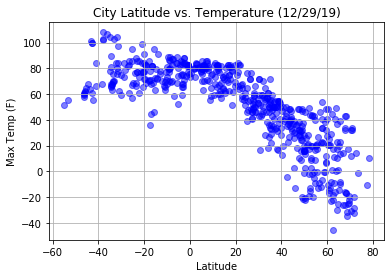

In [21]:
plt.figure()
plt.scatter(new_global_weather_data["Latitude"], new_global_weather_data["Max Temp (F)"],c='b', alpha=0.5)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.savefig("LatVsMaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

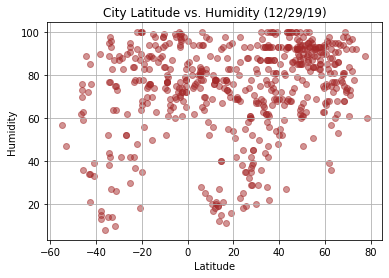

In [22]:
plt.figure()
plt.scatter(new_global_weather_data["Latitude"], new_global_weather_data["Humidity"],c='brown', alpha=0.5)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

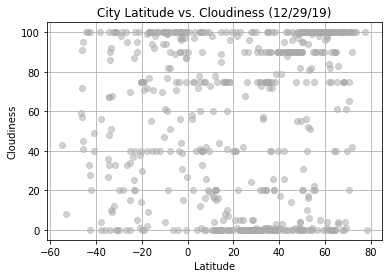

In [23]:
plt.figure()
plt.scatter(new_global_weather_data["Latitude"], new_global_weather_data["Cloudiness"],c='DarkGrey', alpha=0.5)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.savefig("LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

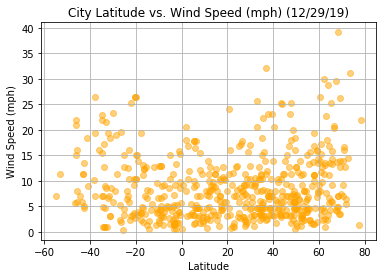

In [24]:
plt.figure()
plt.scatter(new_global_weather_data["Latitude"], new_global_weather_data["Wind Speed (mph)"],c='orange', alpha=0.5)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph) (%s)" % time.strftime("%x"))
plt.savefig("LatVsWindSpeed.png")
plt.show()